In [46]:
import numpy as np
import matplotlib.pyplot as plt

### hypothetical dataset generated using random values

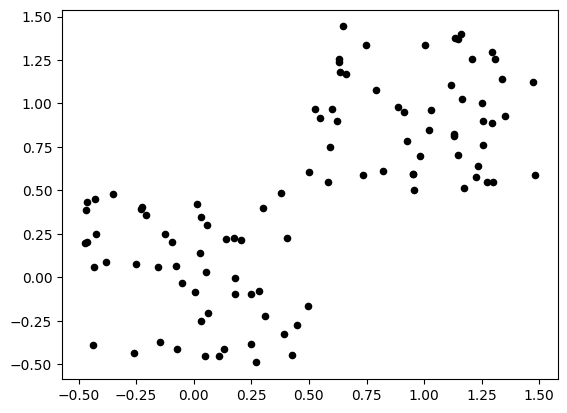

In [47]:
X= -0.5 + np.random.rand(100,2) #100×2 array of random numbers between 0 and 1 ([-0.5 to 0.5] for -0.5)
X1 = 0.5 + np.random.rand(50,2) #range 0.5 to 1.5
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 20, c = 'k')

##### place the centroids randomly in the feature space above (2D), by using the rand() function from Numpy.

In [48]:
centroids = np.random.rand(2,2)
centroids

array([[0.36009009, 0.70853182],
       [0.03743337, 0.34167937]])

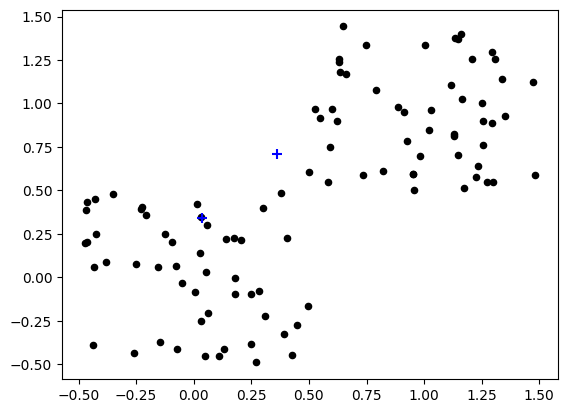

In [49]:
plt.scatter(X[ : , 0], X[ :, 1], s = 20, c = 'k')
plt.scatter(centroids[:,0],centroids[:,1],s = 50, c = 'b',marker = '+')

In [50]:
dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1) #numpy linalg.norm() calc the Euclidean distance
dist[:10,:]

array([[0.87827063],
       [1.14556373],
       [0.4871593 ],
       [0.98622851],
       [1.35987515],
       [1.18561564],
       [0.44887773],
       [0.88512892],
       [1.19480472],
       [0.81048602]])

In [51]:
dist = np.append(dist,np.linalg.norm(X - centroids[1,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[0.87827063, 0.39093542],
       [1.14556373, 0.76183032],
       [0.4871593 , 0.00758974],
       [0.98622851, 0.73973284],
       [1.35987515, 0.87460789],
       [1.18561564, 0.79521216],
       [0.44887773, 0.08171985],
       [0.88512892, 0.68421777],
       [1.19480472, 0.73854119],
       [0.81048602, 0.48490552]])

##### Implementing the Kmeans training algorithm

In [52]:
classes = np.argmin(dist,axis=1)
classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

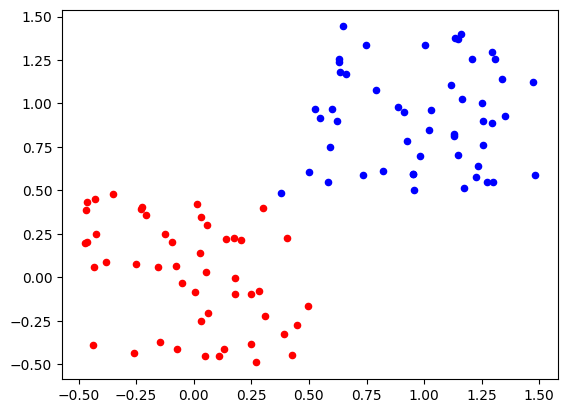

In [53]:
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], s = 20, c = 'b')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], s = 20, c = 'r')

#### update position

In [54]:
for class_ in set(classes):
    centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
centroids

array([[ 0.98265674,  0.91939262],
       [-0.01875854,  0.01639359]])

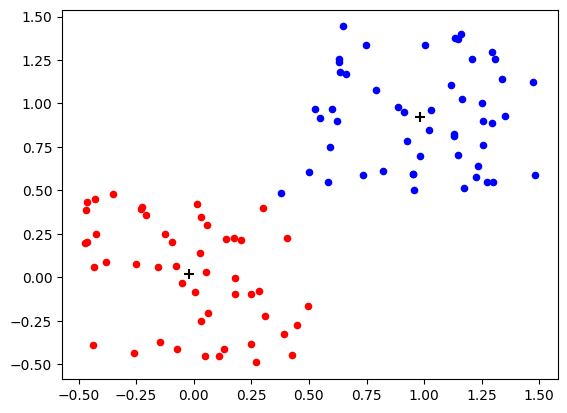

In [55]:
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], s = 20, c = 'b')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], s = 20, c = 'r')
plt.scatter(centroids[:,0],centroids[:,1],s = 50, c = 'k',marker = '+')

In [56]:
class KMeans:
    def __init__(self,k):
        self.k = k

    def train(self,X,MAXITER = 100, TOL = 1e-3):
        centroids = np.random.rand(self.k,X.shape[1])
        centroidsold = centroids.copy()
        for iter_ in range(MAXITER):
            dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
            for class_ in range(1,self.k):
                dist = np.append(dist,np.linalg.norm(X - centroids[class_,:],axis=1).reshape(-1,1),axis=1)
            classes = np.argmin(dist,axis=1)
            # update position
            for class_ in set(classes):
                centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
            if np.linalg.norm(centroids - centroidsold) < TOL:
                break
                print('Centroid converged')
        self.centroids = centroids
    
    def predict(self,X):
        dist = np.linalg.norm(X - self.centroids[0,:],axis=1).reshape(-1,1)
        for class_ in range(1,self.k):
            dist = np.append(dist,np.linalg.norm(X - self.centroids[class_,:],axis=1).reshape(-1,1),axis=1)
        classes = np.argmin(dist,axis=1)
        return classes

In [57]:
kmeans = KMeans(2)
kmeans.train(X)

In [58]:
classes = kmeans.predict(X)
classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

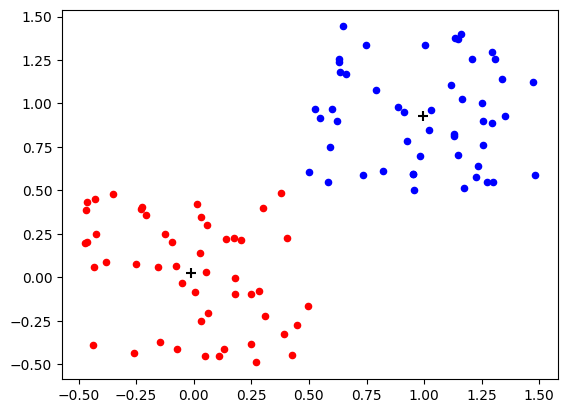

In [59]:
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], s = 20, c = 'b')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], s = 20, c = 'r')
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],s = 50, c = 'k',marker = '+')

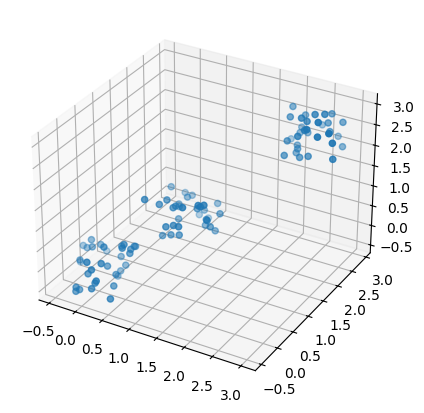

In [60]:
X= -0.5 + np.random.rand(100,3)
X1 = 0.5 + np.random.rand(33,3)
X2 = 2 + np.random.rand(33,3)
X[33:66, :] = X1
X[67:, :] = X2


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])

In [61]:
kmeans = KMeans(3)
kmeans.train(X)

In [62]:
kmeans.centroids


array([[0.09770626, 0.01589655, 0.02434867],
       [1.04948846, 1.00983453, 0.95808632],
       [2.48598887, 2.41250198, 2.50290324]])

In [63]:
classes = kmeans.predict(X)
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

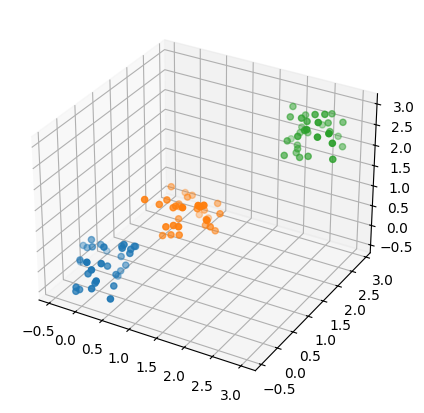

In [64]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[classes == 0,0],X[classes == 0,1],X[classes == 0,2])
ax.scatter(X[classes == 1,0],X[classes == 1,1],X[classes == 1,2])
ax.scatter(X[classes == 2,0],X[classes == 2,1],X[classes == 2,2])